In [62]:
#Importamos las librerías correspondientes
# Importamos la librería ImageDataGenerator,
from keras.preprocessing.image import ImageDataGenerator
# Importamos la librería  array_to_img, img_to_array, load_img
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
# Importamos la librería glob
import glob
# Importamos la librería plt
import matplotlib.pyplot as plt
# Importamos la librería os
import os
#Importamos la libreria shutil
import shutil
#Importamos la libreria random
import random
# Importamos la librería io 
from skimage import io
# Importamos open cv
import cv2

## Descripción del dataset

El presente dataset incorpora fotos de los estudiantes de sexto semestre de la carrera de Ingenieria en tecnologias de la información, cuyo objetivo es la aplicación de las mismas para realizar un reconocimiento facial identificando el nombre de cada uno de los participantes.

Dentro del conjunto de imagenes podemos identificar que se centran en el uso de los formatos jpg, png, jpeg. El esquema de colores utilizado por las imagenes es RGB. Sus dimenciones preestablecidas se encuentran en 5 x 5 cm, siendo imagenes que enfocan los 3 diferentes perfiles del rostro de una persona.

## Descripción del problema
Este dataset contiene varios parámetros/características en donde se requiere realizar un reconocimiento facial de una persona por medio de la predicción basada en imágenes. Cabe mencionar que por cada persona se extrajo un total de tres imagenes de los perfiles del rostro, para el respectivo entrenamiento del modelo que consta del lado frontal, lado derecho y lado izquierdo del rostro de la persona.

## Carga del dataset

In [39]:
# Definimos la ruta del dataset
folder = 'C:\PROYECTOIA-U3/'

In [40]:
#Se observa los nombres de las carpetas
nombres = os.listdir(folder)
# Imprimimos los nombres
print(nombres)

['Ariel Chabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedeño', 'JhonZambrano', 'JordanEspinosa', 'JorgeBorrero', 'JoseRuiz', 'LeonardoBorja', 'LucioCarlos', 'MasacheFernando', 'MelanyLopez', 'MosqueraLucy', 'NatalyAcosta', 'OlallaLuis', 'ParragaMariaJose', 'PauteKevin', 'RaymondDavila', 'RivasSelena', 'SalazarJohana', 'SolanoWilmer', 'SolorzanoBryan']


In [41]:
#Creamos un bucle que se ejecutara hasta que se hayan leido todas las clases
for class_name in nombres:
    # Creamos una ruta especifica con el nombre de la clase
    cur_path = folder + "/" + class_name
    # Obtenemos los elementos de la ruta indicada
    elements = os.listdir(cur_path)
    #Definimos un bucle que lea todos los elementos
    for element in elements:
        # Imprimimos la acción realizada
        print("Copying Image - {} in Fotos_Augmented_1/{}".format(element, class_name))
        # Definimos la ruta de origen de los elementos
        src = os.path.join(folder + "/" + class_name, element) # origen
        # Definimos la ruta de destino de los elementos
        dst = os.path.join("C:\Fotos_Augmented/" + class_name, element) 
        # Realizamos la copia de las fotos
        shutil.copy(src, dst)

Copying Image - L00376418_1.jpg in Fotos_Augmented_1/Ariel Chabla
Copying Image - L00376418_2.jpg in Fotos_Augmented_1/Ariel Chabla
Copying Image - L00376418_3.jpg in Fotos_Augmented_1/Ariel Chabla
Copying Image - L00385770_1.png in Fotos_Augmented_1/ArroboMercy
Copying Image - L00385770_2.png in Fotos_Augmented_1/ArroboMercy
Copying Image - L00385770_3.png in Fotos_Augmented_1/ArroboMercy
Copying Image - L00392978_1.png in Fotos_Augmented_1/BarraganSteven
Copying Image - L00392978_2.png in Fotos_Augmented_1/BarraganSteven
Copying Image - L00392978_3.png in Fotos_Augmented_1/BarraganSteven
Copying Image - L00376416_1.jpg in Fotos_Augmented_1/CevallosJoan
Copying Image - L00376416_2.jpg in Fotos_Augmented_1/CevallosJoan
Copying Image - L00376416_3.jpg in Fotos_Augmented_1/CevallosJoan
Copying Image - L00376481_1.jpg in Fotos_Augmented_1/EnriquezSelena
Copying Image - L00376481_2_.jpg in Fotos_Augmented_1/EnriquezSelena
Copying Image - L00376481_3.jpg in Fotos_Augmented_1/EnriquezSelena


## Impresión del dataset

- Dimensiones de la imagen:
(600, 600, 3)


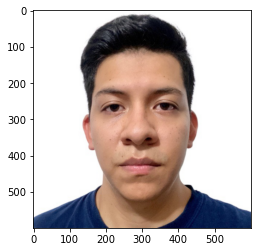

- Dimensiones de la imagen:
(1221, 1221, 3)


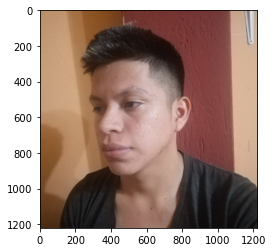

- Dimensiones de la imagen:
(192, 192, 4)


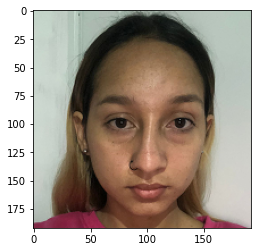

- Dimensiones de la imagen:
(602, 602, 3)


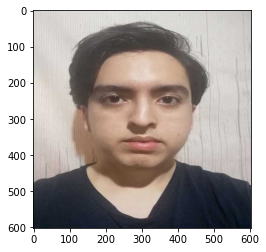

- Dimensiones de la imagen:
(192, 192, 3)


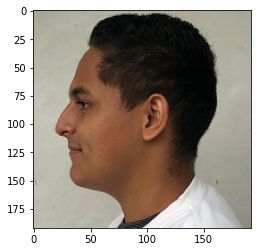

- Dimensiones de la imagen:
(253, 192, 3)


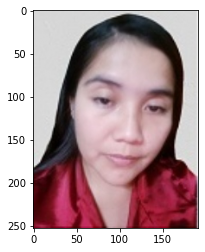

- Dimensiones de la imagen:
(203, 192, 3)


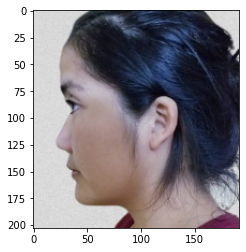

- Dimensiones de la imagen:
(193, 193, 4)


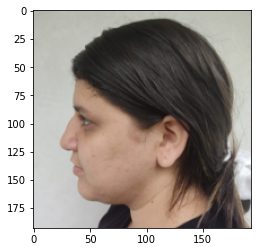

- Dimensiones de la imagen:
(192, 192, 3)


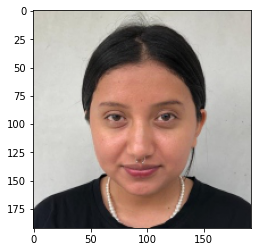

In [71]:
image = []
#Creamos un bucle que se ejecutara hasta que se hayan leido todas las clases
for class_name in nombres:
    # Creamos una ruta especifica con el nombre de la clase
    cur_path = folder + "/" + class_name
    # Obtenemos los elementos de la ruta indicada
    elements = os.listdir(cur_path)
    #Definimos un bucle que lea todos los elementos
    for element in elements:
        image.append(io.imread(folder + "/" + class_name +'/'+ element)/255.0) # imread lee las imagenes con los pixeles codificados como enteros 
        # en el rango 0-255. Por eso la convertimos a flotante y en el rango 0-1
        
for i in range(9):
    print("- Dimensiones de la imagen:")
    ran = random.randint(0, len(image) - 1)
    print(image[ran].shape)
    plt.imshow(image[ran],vmin=0,vmax=1)
    plt.show()

## Data Aumentation 

In [70]:
# Definimos las caracteristicas de las imagenes
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')

## Clase Ariel Chabla

In [71]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/Ariel Chabla/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Ariel_Chabla', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break  

## Clase Arrobo Mercy

In [72]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/ArroboMercy/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Arrobo_Mercy', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break  

## Clase Barragan Steven

In [73]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/BarraganSteven/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Barragan_Steven', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break  

## Clase Cevallos Joan

In [74]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/CevallosJoan/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Cevallos_Joan', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Clase Enriquez Selena

In [75]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/EnriquezSelena/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Enriquez_Selena', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Clase Genesis Heredia

In [76]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/GenesisHeredia/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Genesis_Heredia', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Clase Goyes Anthony

In [77]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/GoyesAnthony/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Goyes_Anthony', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Clase Hector Cedeño

In [90]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/HectorCedeno/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Hector_Cedeno', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Clase Jhon Zambrano

In [91]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/JhonZambrano/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Jhon_Zambrano', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Clase Jordan Espinosa

In [92]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/JordanEspinosa/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Jordan_Espinosa', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Clase Jorge Borrero

In [93]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/JorgeBorrero/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Jorge_Borrero', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Clase Jose Ruiz

In [94]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/JoseRuiz/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Jose_Ruiz', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Clase Leonardo Borja

In [95]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/LeonardoBorja/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Leonardo_Borja', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Clase Lucio Carlos

In [96]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/LucioCarlos/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Lucio_Carlos', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Clase Melany López

In [98]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/MelanyLopez/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Melany_Lopez', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Clase Mosquera Lucy

In [99]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/MosqueraLucy/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Mosquera_Lucy', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Clase Nataly Acosta

In [101]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/NatalyAcosta/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Nataly_Acosta', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Clase Olalla Luis

In [102]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/OlallaLuis/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Olalla_Luis', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Clase Párraga María José

In [103]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/ParragaMariaJose/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Parraga_MariaJose', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Clase Paute Kevin

In [104]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/PauteKevin/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Paute_Kevin', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Clase Raymond Dávila

In [106]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/RaymondDavila/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Raymond_Davila', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Clase Rivas Selena

In [107]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/RivasSelena/")
#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Rivas_Selena', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Clase Salazar Johana

In [108]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/SalazarJohana/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Salazar_Johana', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Clase Solano Wilmer

In [109]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/SolanoWilmer/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Solano_Wilmer', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Clase Solórzano Bryan

In [110]:
#Definimos la ruta
os.chdir(r"C:\Fotos_Augmented/SolorzanoBryan/")

#Definimos un bucle que recorra la ruta
for path in os.listdir():
    # Cargamos la imagen
    img = load_img(f"{path}")
    # Creamos un array Numpy con forma(3, 150, 150)
    x = img_to_array(img)
    # Realisamos un remodelado de las imagen
    x = x.reshape((1,) + x.shape)
    # Inicializamos la variable i
    i = 0
    # Deginimos un bucle que almacenara las nuevas fotos creadas
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Solorzano_Bryan', 
            save_format='jpg'):
        # Aumentamos el contador
        i += 1
        # Condición de detención del bucle
        if i == 1:
            #Fin del bucle
            break

## Filtro NLM para eliminación de ruido de imágenes

In [111]:
# Establecemos la ruta de las imagenes
os.chdir(r"C:\Fotos_Augmented/")
# Almacenamos los nombres de la clases
class_names = os.listdir()
# Ordenamos la lista
class_names.sort()
# Mostramos las clases
print(class_names)

['Ariel Chabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedeno', 'JhonZambrano', 'JordanEspinosa', 'JorgeBorrero', 'JoseRuiz', 'LeonardoBorja', 'LucioCarlos', 'MelanyLopez', 'MosqueraLucy', 'NatalyAcosta', 'OlallaLuis', 'ParragaMariaJose', 'PauteKevin', 'RaymondDavila', 'RivasSelena', 'SalazarJohana', 'SolanoWilmer', 'SolorzanoBryan']


In [114]:
# Asignamos la ruta de las fotos
images_path = "C:\Fotos_Augmented/"
# Definimos un bucle que recorra todas las clases
for class_name in class_names:
    # Obtenemos la ruta de la clase
    cur_path = images_path + "/" + class_name
    # Asignamos la etiqueta de la clase
    cur_label = class_name
    # Inicializamos el contador
    i = 1

    # Definimos un bucle for que recorra todos los elementos
    for file in glob.glob(cur_path + "/*"):
        #Imprimimos un mensaje con la acción ejecutada
        print("Processing Image - {} in {}".format(i, cur_label))
        # Leemos la ruta de la imagen
        image = cv2.imread(file)
        # Eliminamos el ruido de las imagenes
        dst = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
        # Obtenemos el esquema de color
        b,g,r = cv2.split(dst)
        # Establecemos el esquema de color
        rgb_dst = cv2.merge([r,g,b])
        # Guardamos la imagen
        save_path = 'C:\Fotos_SinRuido/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.jpg'),
                    cv2.cvtColor(rgb_dst,cv2.COLOR_RGB2BGR))
        

        # Mostramos el ciclo
        i += 1

Processing Image - 1 in Ariel Chabla
Processing Image - 2 in Ariel Chabla
Processing Image - 3 in Ariel Chabla
Processing Image - 4 in Ariel Chabla
Processing Image - 5 in Ariel Chabla
Processing Image - 6 in Ariel Chabla
Processing Image - 1 in ArroboMercy
Processing Image - 2 in ArroboMercy
Processing Image - 3 in ArroboMercy
Processing Image - 4 in ArroboMercy
Processing Image - 5 in ArroboMercy
Processing Image - 6 in ArroboMercy
Processing Image - 1 in BarraganSteven
Processing Image - 2 in BarraganSteven
Processing Image - 3 in BarraganSteven
Processing Image - 4 in BarraganSteven
Processing Image - 5 in BarraganSteven
Processing Image - 6 in BarraganSteven
Processing Image - 1 in CevallosJoan
Processing Image - 2 in CevallosJoan
Processing Image - 3 in CevallosJoan
Processing Image - 4 in CevallosJoan
Processing Image - 5 in CevallosJoan
Processing Image - 6 in CevallosJoan
Processing Image - 1 in EnriquezSelena
Processing Image - 2 in EnriquezSelena
Processing Image - 3 in Enri